<a href="https://colab.research.google.com/github/fauzularianto/BDDM/blob/main/UAS_3643.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')

data_path = '/content/drive/My Drive/BDDM/weather_classification_data.csv'
df = pd.read_csv(data_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [2]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


#Data Cleaning

In [4]:
df['UV Index'] = df['UV Index'].astype('object')

In [5]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

#EDA


**Split Coloums**

In [8]:
cat = df.select_dtypes(include=object).columns.tolist()
num = df.select_dtypes(exclude=object).columns.tolist()
print('categorical_columns: ' ,cat)
print('numerical_columns: ' ,num)

categorical_columns:  ['Cloud Cover', 'UV Index', 'Season', 'Location', 'Weather Type']
numerical_columns:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']


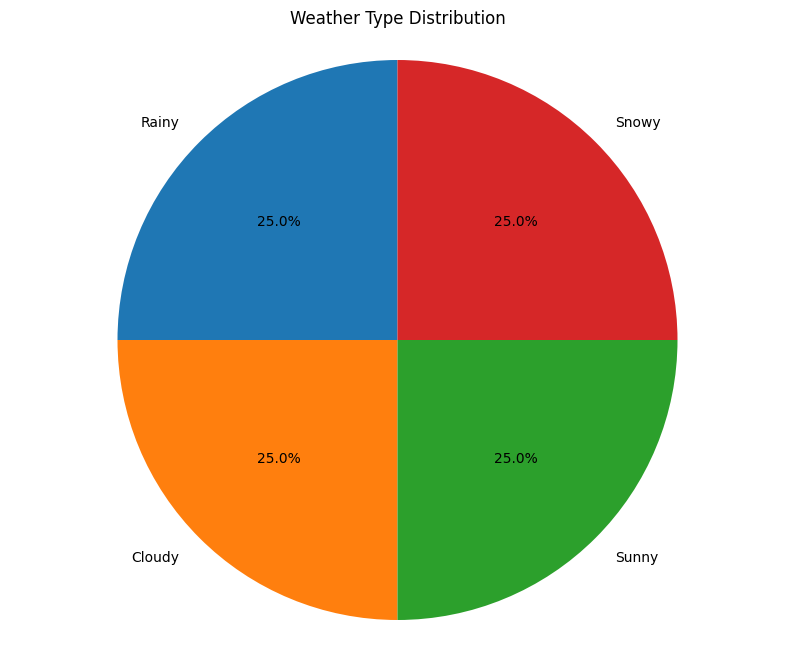

In [9]:
import matplotlib.pyplot as plt

weather_counts = df['Weather Type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Weather Type Distribution')
plt.axis('equal')
plt.show()

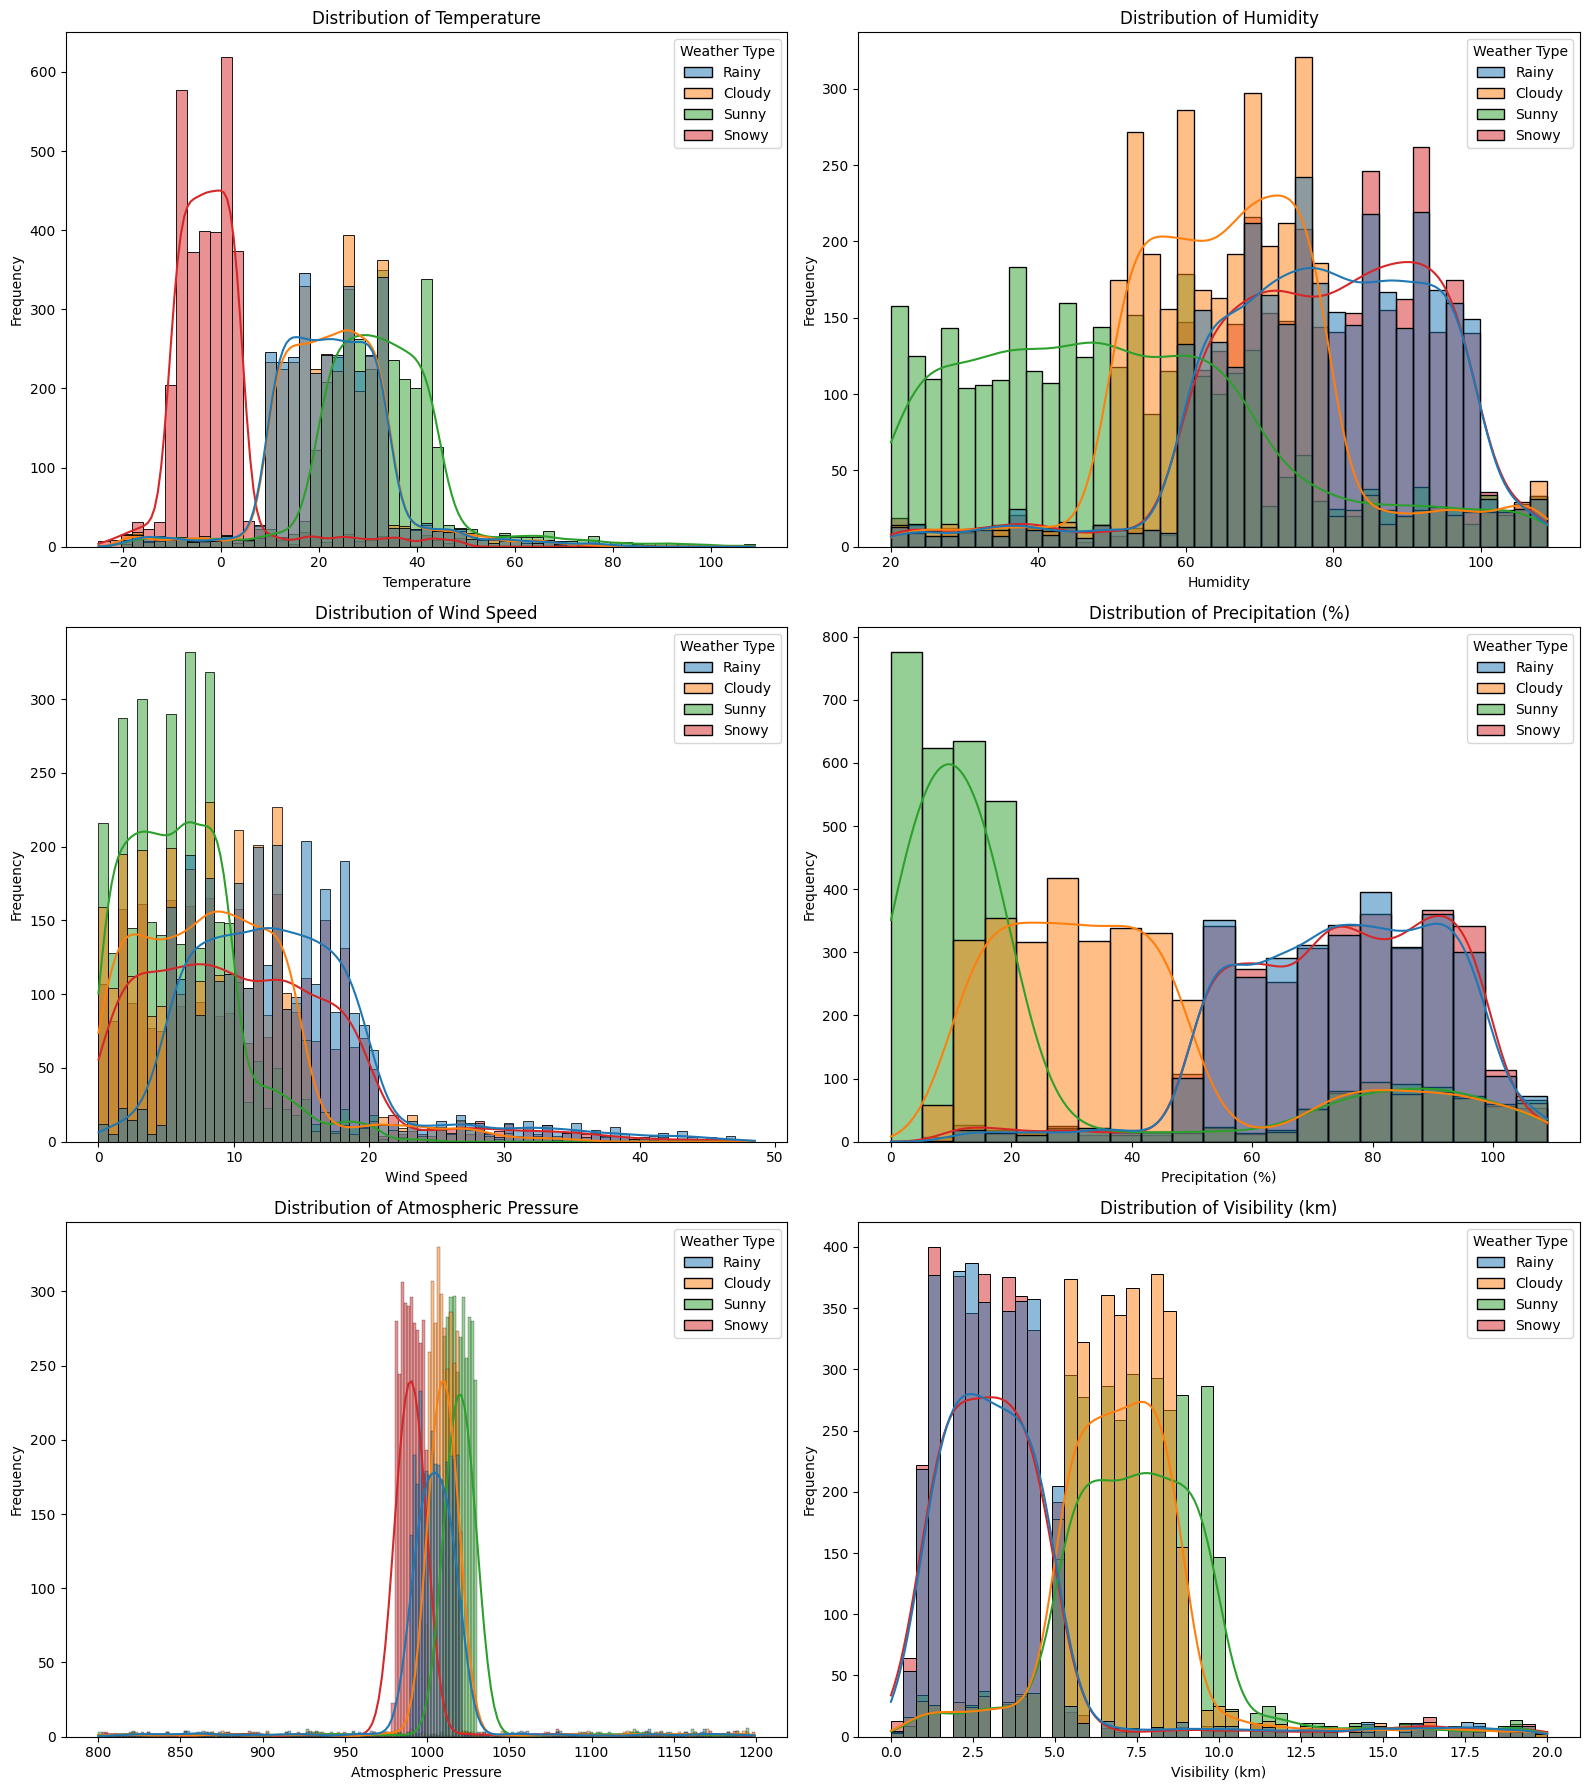

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

num_plots = len(num)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 6))
axes = axes.flatten()

for i, col in enumerate(num):
    sns.histplot(x=df[col], hue=df['Weather Type'], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

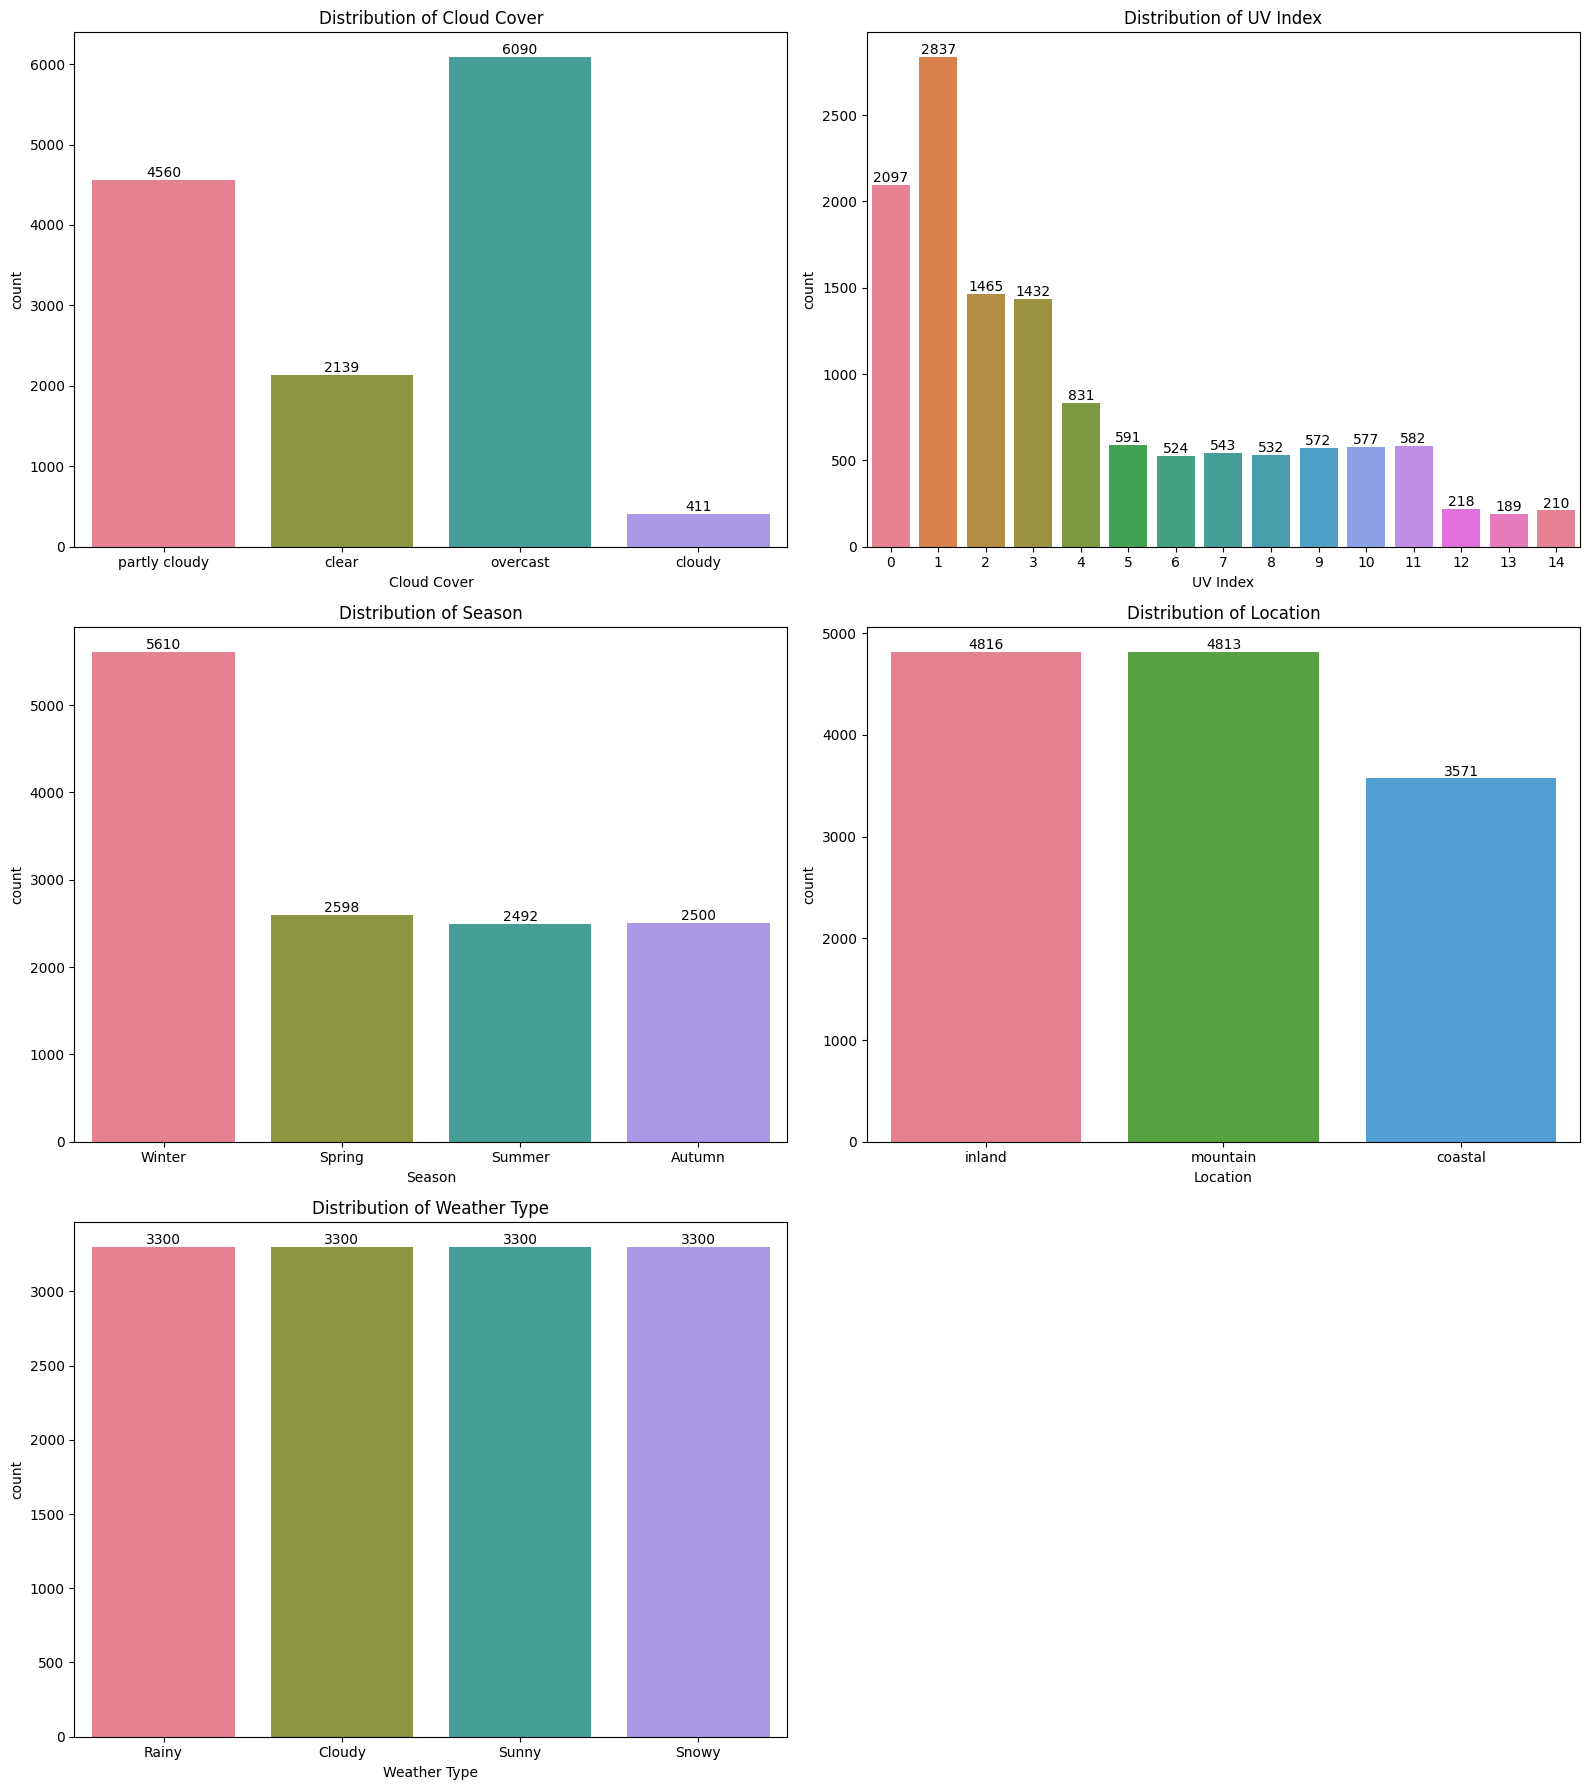

In [11]:

num_plots = len(cat)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 6))
axes = axes.flatten()

for i, col in enumerate(cat):
    unique_values = df[col].unique()
    num_colors = len(unique_values)

    plot = sns.countplot(
        x=col, data=df, hue=col, palette="husl", dodge=False, legend=False, ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}')

    for p in plot.patches:
        count = int(p.get_height())
        if count > 0:
            plot.annotate(
                f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points'
            )

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


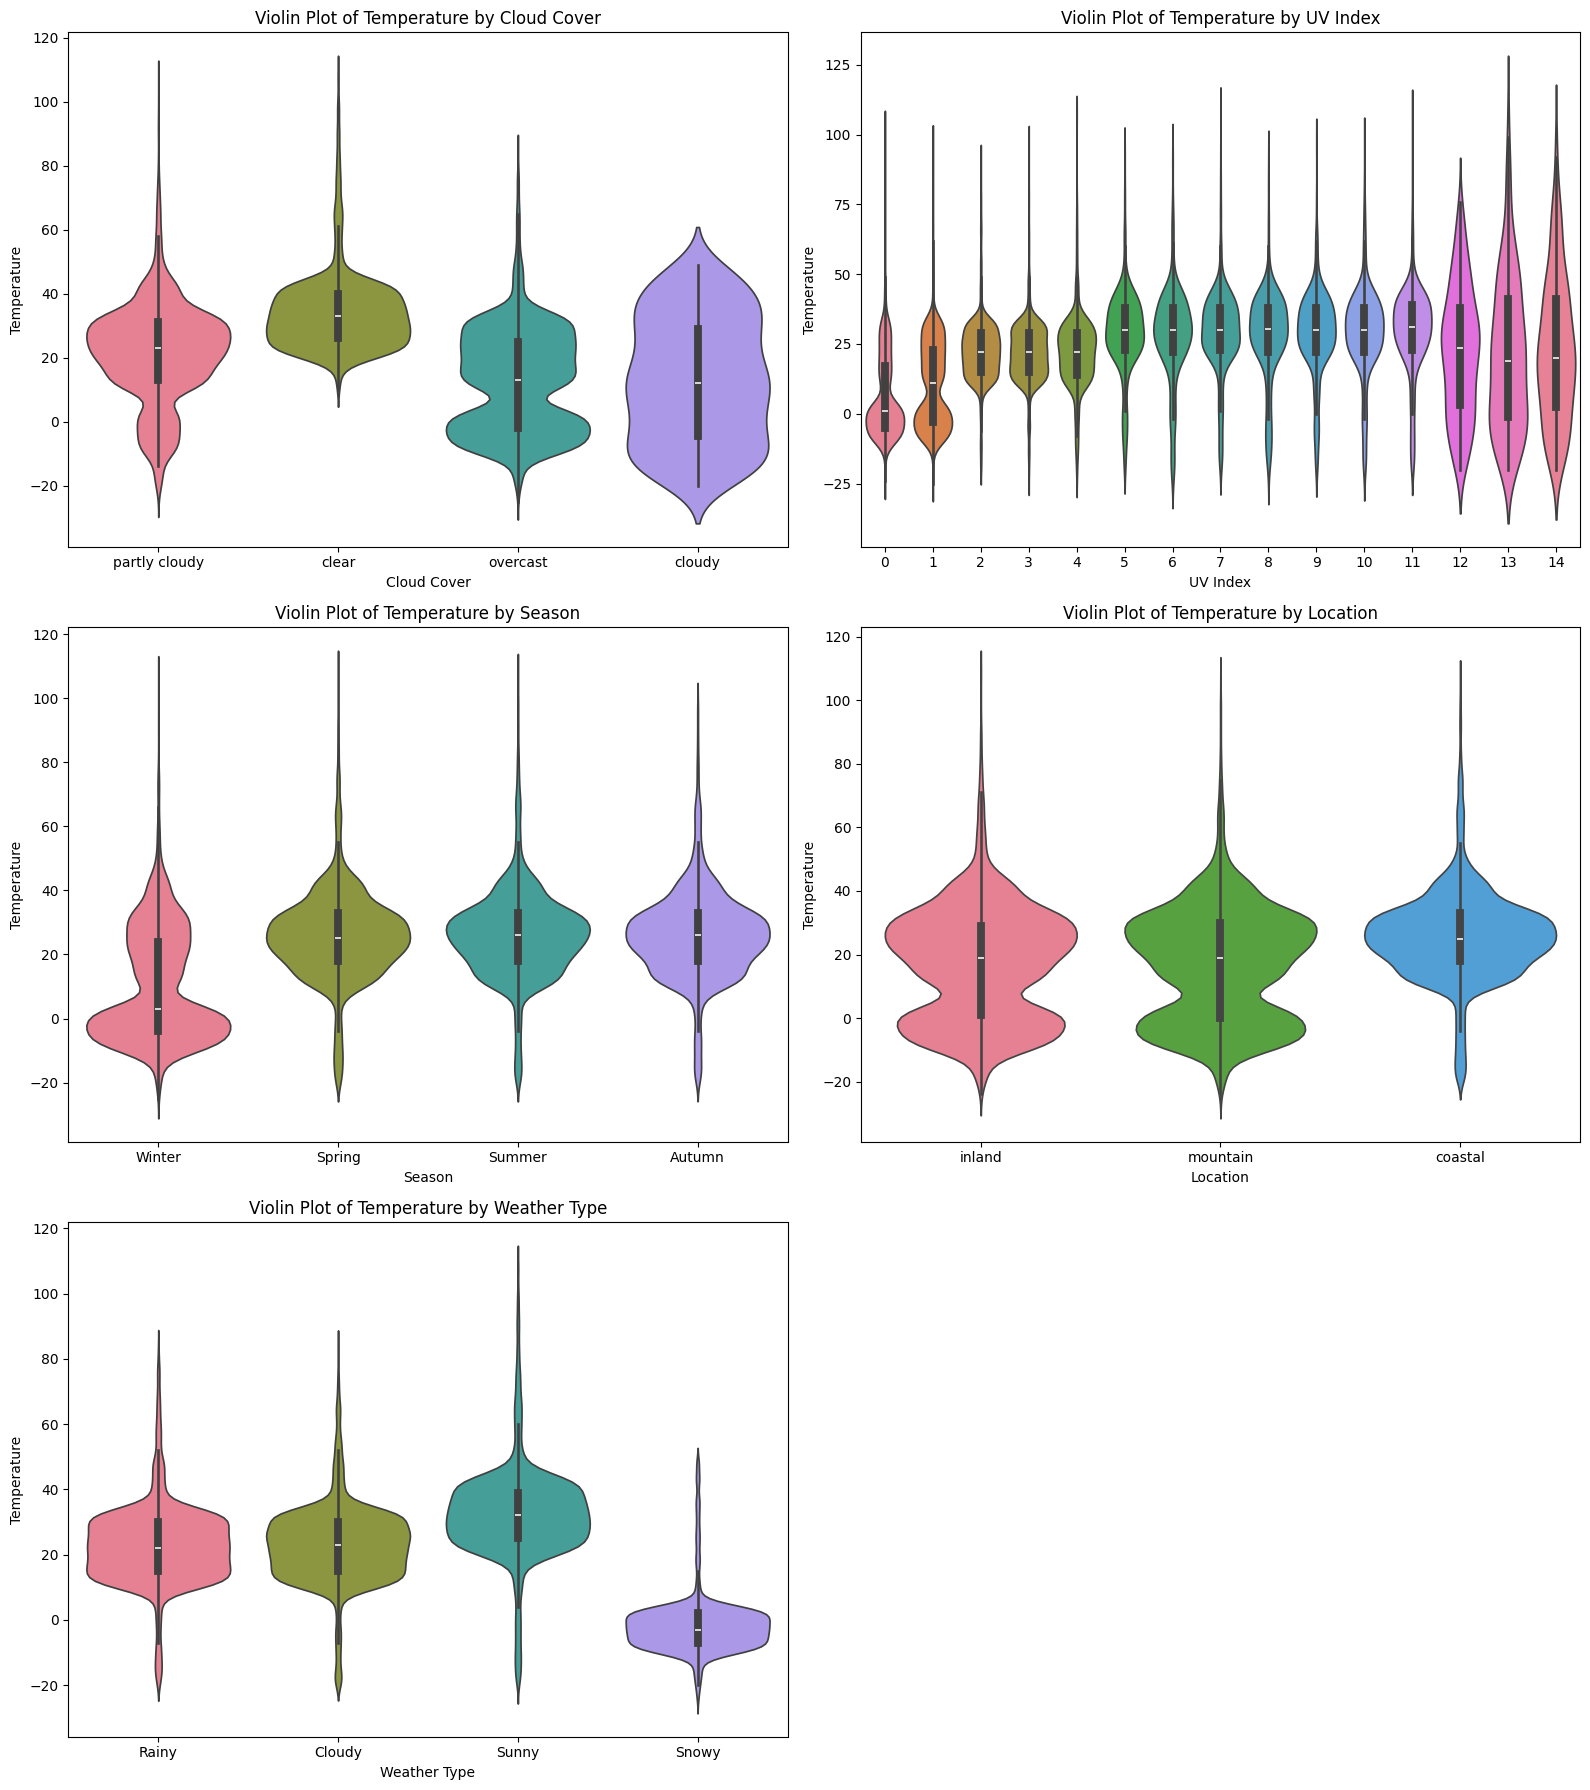

In [12]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_plots = len(cat)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 6))

axes = axes.flatten()

for i, col in enumerate(cat):
    sns.violinplot(x=col, y='Temperature', data=df, ax=axes[i], hue=col, palette="husl", legend=False)
    axes[i].set_title(f'Violin Plot of Temperature by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Temperature')

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Data Processing

In [13]:
def identify_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=np.number).columns

for col in numerical_columns:
    outliers = identify_outliers_iqr(df[col])
    print(f"Outliers in {col}:\n{outliers}\n")

Outliers in Temperature:
210      78.0
228      73.0
535      80.0
709      74.0
730      76.0
         ... 
12752    90.0
12814    72.0
12878    95.0
13065    97.0
13108    81.0
Name: Temperature, Length: 92, dtype: float64

Outliers in Humidity:
Series([], Name: Humidity, dtype: int64)

Outliers in Wind Speed:
63       46.5
90       28.5
123      28.0
208      34.0
228      47.0
         ... 
12999    28.5
13066    31.0
13113    32.5
13115    26.5
13176    36.0
Name: Wind Speed, Length: 404, dtype: float64

Outliers in Precipitation (%):
Series([], Name: Precipitation (%), dtype: float64)

Outliers in Atmospheric Pressure:
10        879.88
38       1132.20
58       1074.07
72       1063.39
85       1160.48
          ...   
13167     840.06
13168     894.65
13178     822.40
13184    1128.35
13196    1067.23
Name: Atmospheric Pressure, Length: 927, dtype: float64

Outliers in Visibility (km):
38       16.5
113      17.5
134      17.0
300      17.0
359      16.0
         ... 
13018    1

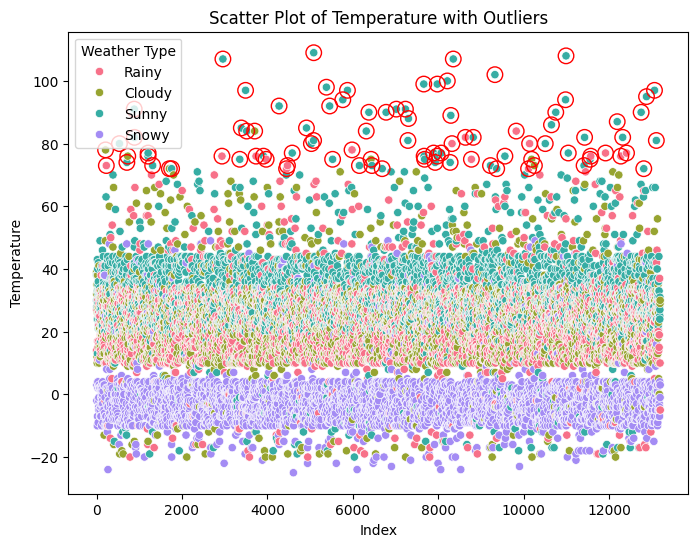

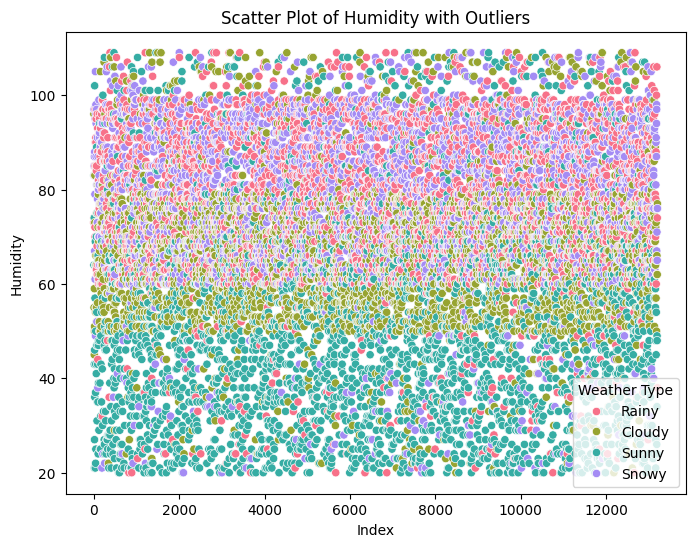

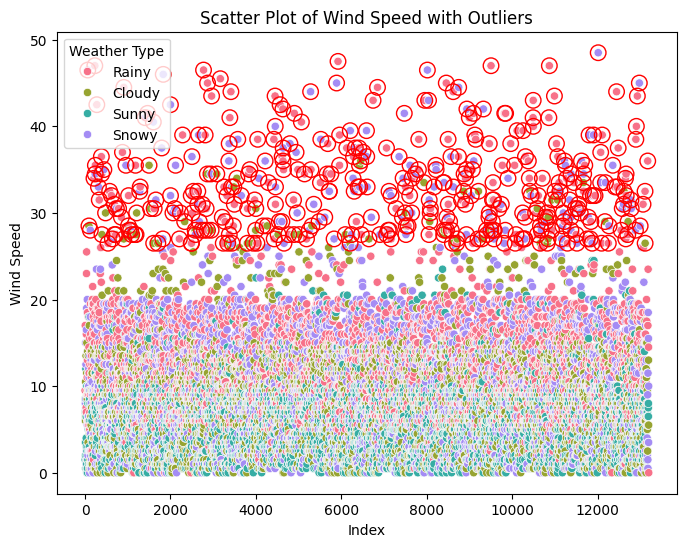

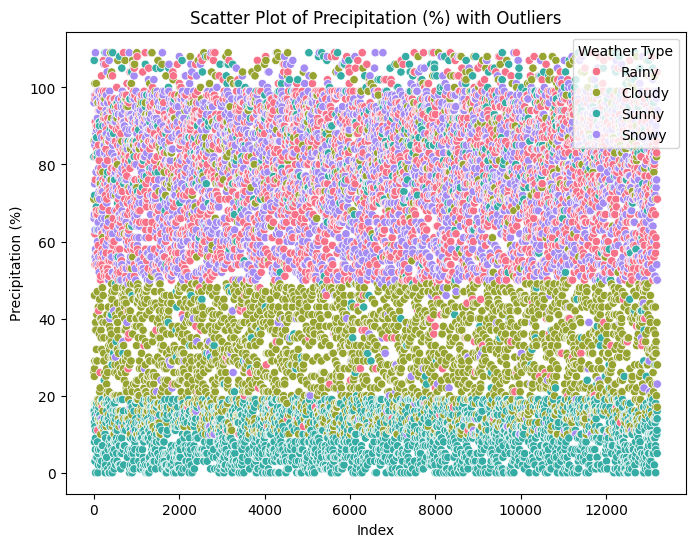

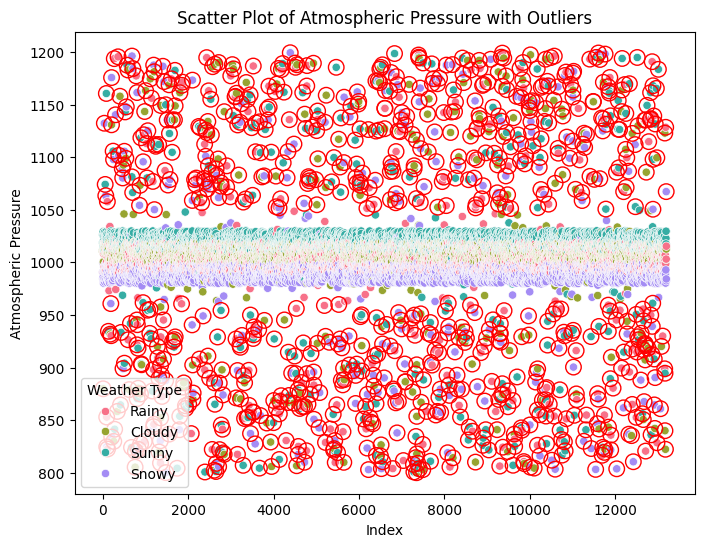

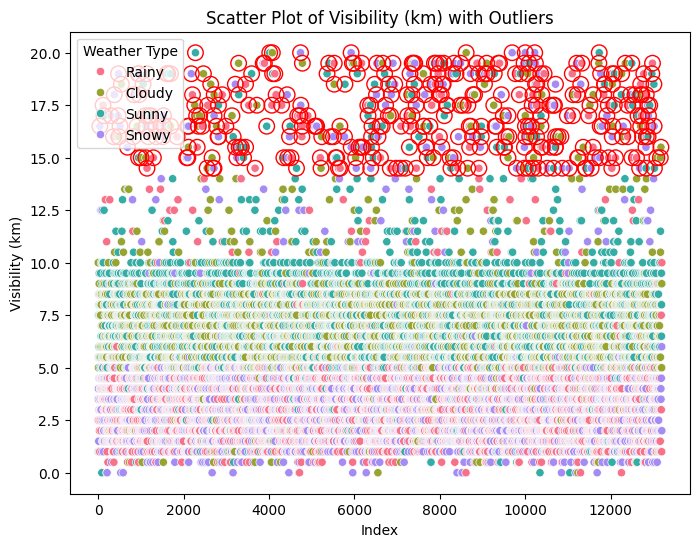

In [14]:
import seaborn as sns

for col in numerical_columns:
    outliers = identify_outliers_iqr(df[col])
    plt.figure(figsize=(8, 6))

    sns.scatterplot(
        x=df.index,
        y=df[col],
        hue=df['Weather Type'],
        palette='husl',
        legend='full'
    )

    for outlier_index in outliers.index:
        plt.scatter(
            outlier_index,
            df.loc[outlier_index, col],
            facecolors='none',
            edgecolors='red',
            linewidths=1,
            s=125,
        )

    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter Plot of {col} with Outliers')

    plt.show()

In [15]:
from scipy import stats

numerical_df = df.select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(numerical_df))
df_cleaned = df[(z_scores < 3).all(axis=1)]

print(f"Number of rows before: {len(df)}")
print(f"Number of rows after: {len(df_cleaned)}")

Number of rows before: 13200
Number of rows after: 12151


In [16]:
weather_counts = df_cleaned['Weather Type'].value_counts()
weather_counts

Weather Type
Cloudy    3101
Sunny     3045
Snowy     3027
Rainy     2978
Name: count, dtype: int64

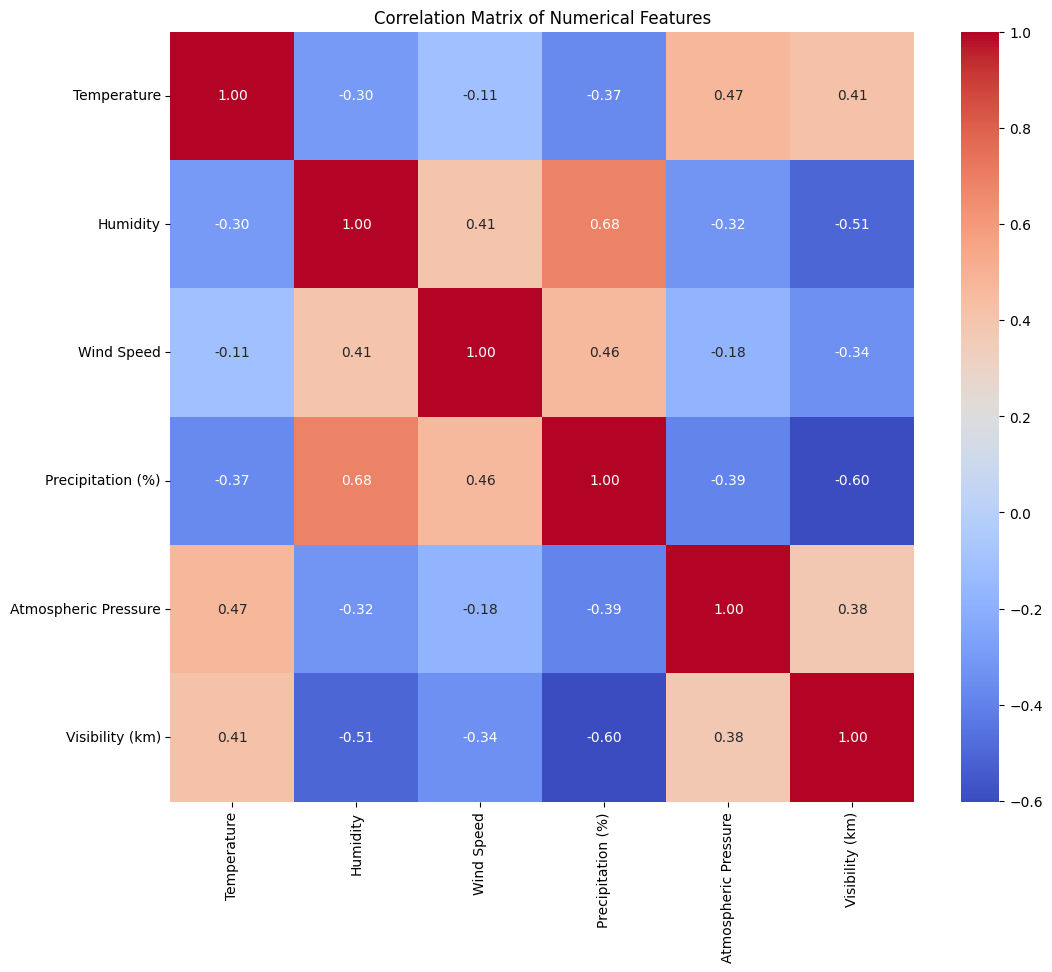

In [17]:
correlation_matrix = df_cleaned[num].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cat:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

In [19]:
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

X = df_cleaned.drop('Weather Type', axis=1)
y = df_cleaned['Weather Type']

mi_scores = mutual_info_classif(X, y)

mi_scores_series = pd.Series(mi_scores, index=X.columns)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

selected_features_mi = mi_scores_series[mi_scores_series > 0.1].index
unselected_features_mi = mi_scores_series[mi_scores_series <= 0.1].index

X_filtered_mi = X[selected_features_mi]

print("Selected Features (MI):", selected_features_mi)
print("Unselected Features (MI):", unselected_features_mi)

Selected Features (MI): Index(['Atmospheric Pressure', 'Precipitation (%)', 'Temperature', 'UV Index',
       'Visibility (km)', 'Cloud Cover', 'Humidity', 'Season', 'Wind Speed'],
      dtype='object')
Unselected Features (MI): Index(['Location'], dtype='object')


In [20]:
X_filtered_mi.head()

Atmospheric Pressure  Precipitation (%)  Temperature  UV Index  \
0               1010.82               82.0         14.0         2   
1               1011.43               71.0         39.0         7   
2               1018.72               16.0         30.0         5   
3               1026.25               82.0         38.0         7   
4                990.67               66.0         27.0         1   

   Visibility (km)  Cloud Cover  Humidity  Season  Wind Speed  
0              3.5            3        73       3         9.5  
1             10.0            3        96       1         8.5  
2              5.5            0        64       1         7.0  
3              1.0            0        83       1         1.5  
4              2.5            2        74       3        17.0

#Machine Learning Modeling

In [21]:
from sklearn.model_selection import train_test_split
features = X_filtered_mi
x = features
y = df_cleaned['Weather Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9113, 9) (3038, 9) (9113,) (3038,)



Gradient Boosting
Accuracy: 0.9546
Precision: 0.9549
Recall: 0.9546
F1-score: 0.9547

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       790
           1       0.93      0.96      0.94       754
           2       0.98      0.96      0.97       756
           3       0.96      0.96      0.96       738

    accuracy                           0.95      3038
   macro avg       0.96      0.95      0.95      3038
weighted avg       0.95      0.95      0.95      3038



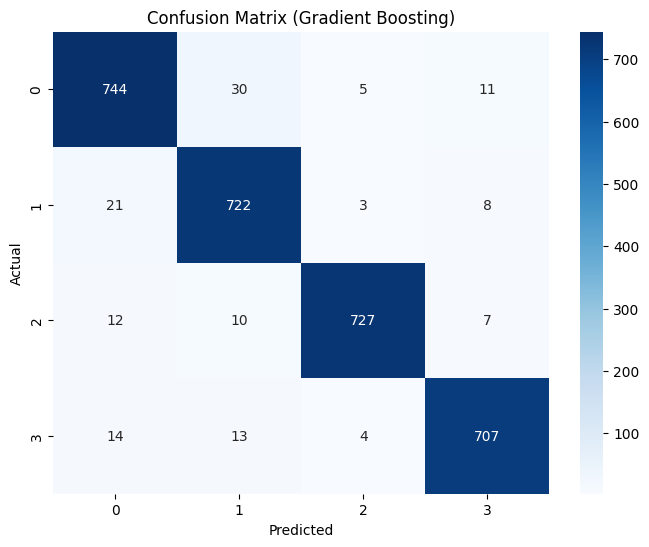

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

def evaluate_model(name, model, x_train, y_train, x_test, y_test):

    print(f"\n{name}")
    print("=" * len(name))

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({name})")
    plt.show()

for name, model in models.items():
    evaluate_model(name, model, x_train, y_train, x_test, y_test)


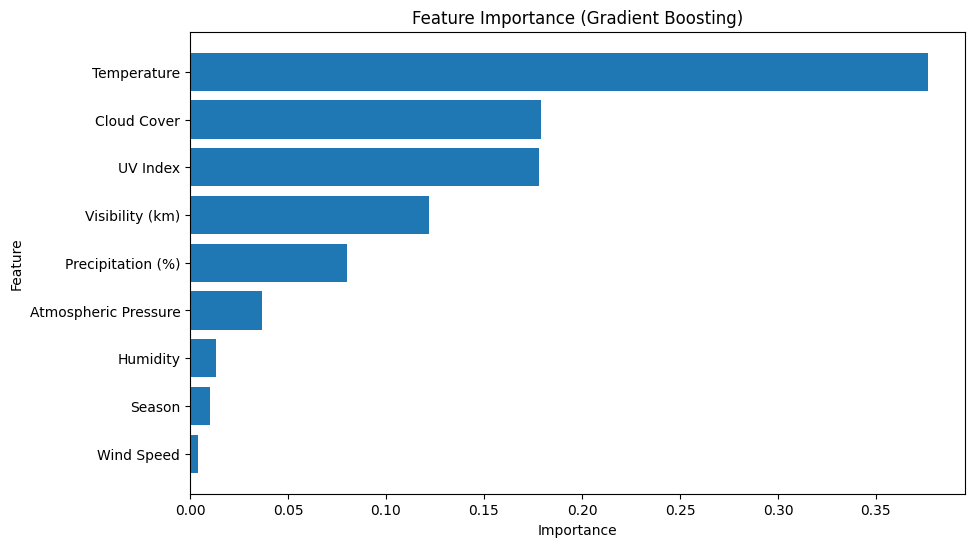

In [23]:
importances = models["Gradient Boosting"].feature_importances_
feature_names = list(x.columns)

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()